In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob
import os
import scipy.stats as stats
import scikit_posthocs as sp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_colwidth', None)

## Daten einlesen und bereinigen

In [329]:
# Saxer train einlesen
# Pfad zum Verzeichnis, das die CSV-Dateien enthält
path_saxer = "results/train/"
file_pattern = "*.csv"  # Muster, um alle CSV-Dateien zu matchen
file_path = path_saxer + file_pattern

# Erstellen einer Liste aller CSV-Dateien im Verzeichnis
all_files = glob.glob(file_path)

# Einlesen jeder Datei in einen DataFrame und Speichern in einer Liste
dfs = [pd.read_csv(file) for file in all_files]

# Zusammenführen aller DataFrames in der Liste zu einem einzigen DataFrame
df_train_saxer = pd.concat(dfs, ignore_index=True)

# Saxer test einlesen
df_test_saxer = pd.read_csv("results/test/all_pitches_test.csv")

In [330]:
print("Länge df_train_saxer", len(df_train_saxer))
print(df_train_saxer.head(5))

print("Länge df_test_saxer", len(df_test_saxer))
print(df_test_saxer.tail(5))

Länge df_train_saxer 81864123
                                                                                                                                                                     File  \
0  ./wav/clips__train_valid/1011121314151617/clips__train_valid_f975c67c-35a5-4cac-8195-51f456b59edc_3f4a816b6520cdc89be322f0fe502697405fb082cd1cf03cb9029111d2efb434.wav   
1  ./wav/clips__train_valid/1011121314151617/clips__train_valid_f975c67c-35a5-4cac-8195-51f456b59edc_3f4a816b6520cdc89be322f0fe502697405fb082cd1cf03cb9029111d2efb434.wav   
2  ./wav/clips__train_valid/1011121314151617/clips__train_valid_f975c67c-35a5-4cac-8195-51f456b59edc_3f4a816b6520cdc89be322f0fe502697405fb082cd1cf03cb9029111d2efb434.wav   
3  ./wav/clips__train_valid/1011121314151617/clips__train_valid_f975c67c-35a5-4cac-8195-51f456b59edc_3f4a816b6520cdc89be322f0fe502697405fb082cd1cf03cb9029111d2efb434.wav   
4  ./wav/clips__train_valid/1011121314151617/clips__train_valid_f975c67c-35a5-4cac-8195-51f456b59edc_3f4a

In [331]:
# Pfad zu train valid und test Daten
path_data = "Daten/"

train_file = "train_balanced.tsv"
file_path_train = path_data + train_file

test_file = "test.tsv"
file_path_test = path_data + test_file

df_train = pd.read_csv(file_path_train, sep='\t')
df_test = pd.read_csv(file_path_test, sep='\t')

print(len(df_train))
print(df_train.head(5))
print(len(df_test))
print(df_test.head(5))

173194
                                                                                                         path  \
0  00fafc97-bf8b-4f35-ae97-b22e83e150f2/8ff3d4ae5e580bae940b60f4f1422c1ddf2726f4b8c06230d50abd089750aa1a.flac   
1  e3589d10-6d5b-4f8e-a48a-5704f74113f8/9a3ff58beb53c95c2a7cd36b0913e582d4535219e4c3ca1a6041205783313e26.flac   
2  d507d0fb-8255-4565-b75e-cf5b7e73d480/ddd6aa8f3bc5e091ccf8fdf37d40e51d0d13733f826c024de7141d16f0065796.flac   
3  9260cad2-83f3-4d94-80ca-de32832a9533/4ed58f456cc5a8ec11fcb951872186c4ae3fc1f1c4ec2346a1d15530ea5d07a5.flac   
4  55c50553-c23a-47a6-9cfc-2db808656368/d3efc55a6f4722e4bd2f94b86f12b27cb9871ad2cca2537ea6d969139c022c2a.flac   

   duration                                                     sentence  \
0  5.944308  Deshalb zeichnete die Jury drei weitere gute Beispiele aus.   
1  5.802676                      1. Szene Mia und Erich besprechen sich.   
2  4.351995          Wir von der Fraktion FDP sind erleichtert und froh.   
3  4.52267

In [332]:
def process_data_optimized(df):
    # Vorfilterung für Effizienz
    df = df[(df['Pitch'] >= 60) & (df['Pitch'] <= 300) & (df['Pitch'] != 0) & (df['Confidence'] >= 0.8)]
    return df

# Anwendung der optimierten Funktion
filtered_train_saxer = process_data_optimized(df_train_saxer)
filtered_test_saxer = process_data_optimized(df_test_saxer)

# Ausgabe der Ergebnisse für Trainingsdaten
print("\nZusammenfassung der Spalte 'Pitch' für Trainingsdaten:")
print(filtered_train_saxer['Pitch'].describe())
print("\nZusammenfassung der Spalte 'Confidence' für Trainingsdaten:")
print(filtered_train_saxer['Confidence'].describe())
print("\nLänge aller Trainingsdaten:", len(df_train_saxer))
print("Länge gefilterte Trainingsdaten:", len(filtered_train_saxer))
print("Anzahl Audiodateien in den Trainingsdaten:", len(df_train_saxer['File'].unique()))
print("Anzahl gefilterte Audiodateien in Trainingsdaten:", len(filtered_train_saxer['File'].unique()))

# Ausgabe der Ergebnisse für Testdaten
print("\nZusammenfassung der Spalte 'Pitch' für Testdaten:")
print(filtered_test_saxer['Pitch'].describe())
print("\nZusammenfassung der Spalte 'Confidence' für Testdaten:")
print(filtered_test_saxer['Confidence'].describe())
print("\nLänge aller Testdaten:", len(df_test_saxer))
print("Länge gefilterte Testdaten:", len(filtered_test_saxer))
print("Anzahl Audiodateien in den Testdaten:", len(df_test_saxer['File'].unique()))
print("Anzahl gefilterte Audiodateien in Testdaten:", len(filtered_test_saxer['File'].unique()))


Zusammenfassung der Spalte 'Pitch' für Trainingsdaten:
count    1.092790e+07
mean     1.913162e+02
std      4.646556e+01
min      6.000150e+01
25%      1.600630e+02
50%      1.970550e+02
75%      2.233390e+02
max      3.000000e+02
Name: Pitch, dtype: float64

Zusammenfassung der Spalte 'Confidence' für Trainingsdaten:
count    1.092790e+07
mean     9.200222e-01
std      7.066420e-02
min      8.000000e-01
25%      8.767450e-01
50%      9.306360e-01
75%      9.684980e-01
max      6.886970e+01
Name: Confidence, dtype: float64

Länge aller Trainingsdaten: 81864123
Länge gefilterte Trainingsdaten: 10927902
Anzahl Audiodateien in den Trainingsdaten: 189484
Anzahl gefilterte Audiodateien in Trainingsdaten: 184863

Zusammenfassung der Spalte 'Pitch' für Testdaten:
count    1.531778e+06
mean     1.894049e+02
std      4.551339e+01
min      6.000000e+01
25%      1.559120e+02
50%      1.948025e+02
75%      2.212070e+02
max      2.999980e+02
Name: Pitch, dtype: float64

Zusammenfassung der Spalte 

In [333]:
# train für Join Format vorbereiten
# filtered_train_saxer
filtered_train_saxer['File'] = filtered_train_saxer['File'].apply(
    lambda x: x.split('clips__train_valid_')[-1].replace('.wav', '')
)
print(filtered_train_saxer.head(5))

# df_train
df_train['path'] = df_train['path'].str.replace('.flac', '', regex=False).str.replace('/', '_')
print(df_train.head(5))

C:\Users\pzinn\AppData\Local\Temp\ipykernel_11456\247858163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_saxer['File'] = filtered_train_saxer['File'].apply(


                                                                                                     File  \
69  f975c67c-35a5-4cac-8195-51f456b59edc_3f4a816b6520cdc89be322f0fe502697405fb082cd1cf03cb9029111d2efb434   
70  f975c67c-35a5-4cac-8195-51f456b59edc_3f4a816b6520cdc89be322f0fe502697405fb082cd1cf03cb9029111d2efb434   
71  f975c67c-35a5-4cac-8195-51f456b59edc_3f4a816b6520cdc89be322f0fe502697405fb082cd1cf03cb9029111d2efb434   
72  f975c67c-35a5-4cac-8195-51f456b59edc_3f4a816b6520cdc89be322f0fe502697405fb082cd1cf03cb9029111d2efb434   
73  f975c67c-35a5-4cac-8195-51f456b59edc_3f4a816b6520cdc89be322f0fe502697405fb082cd1cf03cb9029111d2efb434   

      Pitch  Confidence  
69  256.792    0.902941  
70  253.845    0.945323  
71  254.280    0.963865  
72  254.888    0.986144  
73  255.847    0.991871  
                                                                                                    path  \
0  00fafc97-bf8b-4f35-ae97-b22e83e150f2_8ff3d4ae5e580bae940b60f4f1422c1ddf2726f4b

In [334]:
# test für Join Format vorbereiten
# filtered_test_saxer
filtered_test_saxer['File'] = filtered_test_saxer['File'].apply(
    lambda x: x.split('/')[-1].replace('clips__test_', '').replace('.wav', '')
)
print(filtered_test_saxer.head(5))

# df_test
df_test['path'] = df_test['path'].str.replace('.mp3', '', regex=False).str.replace('/', '_')
print(df_test.head(5))

                                                                                                     File  \
61  fb1b67be-8d8f-47bb-b15c-ee1138f0d4ac_7879f9a892e492c92682d3b55fe98ae0f29300c9e74410831e8eec3359775ee2   
62  fb1b67be-8d8f-47bb-b15c-ee1138f0d4ac_7879f9a892e492c92682d3b55fe98ae0f29300c9e74410831e8eec3359775ee2   
63  fb1b67be-8d8f-47bb-b15c-ee1138f0d4ac_7879f9a892e492c92682d3b55fe98ae0f29300c9e74410831e8eec3359775ee2   
64  fb1b67be-8d8f-47bb-b15c-ee1138f0d4ac_7879f9a892e492c92682d3b55fe98ae0f29300c9e74410831e8eec3359775ee2   
65  fb1b67be-8d8f-47bb-b15c-ee1138f0d4ac_7879f9a892e492c92682d3b55fe98ae0f29300c9e74410831e8eec3359775ee2   

      Pitch  Confidence  
61  190.508    0.846839  
62  189.737    0.868720  
63  187.910    0.944480  
64  185.503    0.946093  
65  181.783    0.953006  
                                                                                                    path  \
0  8800b4de-fa22-4fdc-9f29-457c4010fd57_d5779092880a36b837917aba3d1b63b6c12c7cad1

C:\Users\pzinn\AppData\Local\Temp\ipykernel_11456\2206106582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_saxer['File'] = filtered_test_saxer['File'].apply(


## Datensätze zusammenfügen

In [335]:
# Join für train
result_df = pd.merge(filtered_train_saxer, df_train[['path', 'client_id', 'dialect_region', 'canton', 'zipcode', 'age', 'gender']],
                     left_on='File', right_on='path', how='left')

# Löschen der Spalte 'file_name', da sie nicht mehr benötigt wird
result_df = result_df.drop(columns='path')

# Länge
print("Länge vor Join", len(filtered_train_saxer))
print("Länge nach Join", len(result_df))

# NA Check
print("Anzahl der NA-Werte in jeder Spalte:\n", result_df.isna().sum())
# Zeilen mit NaN-Werten entfernen
result_df = result_df.dropna()
print("Anzahl der NA-Werte in jeder Spalte:\n", result_df.isna().sum())

print(result_df.head())

Länge vor Join 10927902
Länge nach Join 10927902
Anzahl der NA-Werte in jeder Spalte:
 File                    0
Pitch                   0
Confidence              0
client_id         2342236
dialect_region    2342236
canton            2644105
zipcode           2644105
age               2342236
gender            2342236
dtype: int64
Anzahl der NA-Werte in jeder Spalte:
 File              0
Pitch             0
Confidence        0
client_id         0
dialect_region    0
canton            0
zipcode           0
age               0
gender            0
dtype: int64
                                                                                                    File  \
0  f975c67c-35a5-4cac-8195-51f456b59edc_3f4a816b6520cdc89be322f0fe502697405fb082cd1cf03cb9029111d2efb434   
1  f975c67c-35a5-4cac-8195-51f456b59edc_3f4a816b6520cdc89be322f0fe502697405fb082cd1cf03cb9029111d2efb434   
2  f975c67c-35a5-4cac-8195-51f456b59edc_3f4a816b6520cdc89be322f0fe502697405fb082cd1cf03cb9029111d2efb434   
3  

In [336]:
# Join für test
result_df_test = pd.merge(filtered_test_saxer, df_test[['path', 'client_id', 'dialect_region', 'canton', 'zipcode', 'age', 'gender']],
                     left_on='File', right_on='path', how='left')

# Löschen der Spalte 'file_name', da sie nicht mehr benötigt wird
result_df_test = result_df_test.drop(columns='path')

# Länge
print("Länge vor Join", len(filtered_test_saxer))
print("Länge nach Join", len(result_df_test))

# NA Check
print("Anzahl der NA-Werte in jeder Spalte:\n", result_df_test.isna().sum())

print(result_df_test.head(5))

Länge vor Join 1531778
Länge nach Join 1531778
Anzahl der NA-Werte in jeder Spalte:
 File              0
Pitch             0
Confidence        0
client_id         0
dialect_region    0
canton            0
zipcode           0
age               0
gender            0
dtype: int64
                                                                                                    File  \
0  fb1b67be-8d8f-47bb-b15c-ee1138f0d4ac_7879f9a892e492c92682d3b55fe98ae0f29300c9e74410831e8eec3359775ee2   
1  fb1b67be-8d8f-47bb-b15c-ee1138f0d4ac_7879f9a892e492c92682d3b55fe98ae0f29300c9e74410831e8eec3359775ee2   
2  fb1b67be-8d8f-47bb-b15c-ee1138f0d4ac_7879f9a892e492c92682d3b55fe98ae0f29300c9e74410831e8eec3359775ee2   
3  fb1b67be-8d8f-47bb-b15c-ee1138f0d4ac_7879f9a892e492c92682d3b55fe98ae0f29300c9e74410831e8eec3359775ee2   
4  fb1b67be-8d8f-47bb-b15c-ee1138f0d4ac_7879f9a892e492c92682d3b55fe98ae0f29300c9e74410831e8eec3359775ee2   

     Pitch  Confidence                             client_id dialect_regi

### Pitch filttern nach Geschlecht und Ausreisserentfernung

In [337]:
def filter_and_combine_by_pitch(df, male_pitch_range, female_pitch_range):
    # Männer Pitch Bereich
    male_df = df[(df['gender'] == 'male') &
                 (df['Pitch'] >= male_pitch_range[0]) & 
                 (df['Pitch'] <= male_pitch_range[1])]
    
    # Frauen Pitch Bereich
    female_df = df[(df['gender'] == 'female') &
                   (df['Pitch'] >= female_pitch_range[0]) & 
                   (df['Pitch'] <= female_pitch_range[1])]
    
    # Kombinieren der DataFrames
    combined_df = pd.concat([male_df, female_df])
    return combined_df

# Anwendung der Funktion
result_df = filter_and_combine_by_pitch(result_df, (60, 200), (150, 300))
result_df_test = filter_and_combine_by_pitch(result_df_test, (60, 200), (150, 300))

def process_data_optimized(df):
    # Berechnung von Q1, Q3 und IQR für jede Datei in einem Durchgang
    grp = df.groupby('client_id')['Pitch']
    Q1 = grp.transform(lambda x: x.quantile(0.25))
    Q3 = grp.transform(lambda x: x.quantile(0.75))
    IQR = Q3 - Q1

    # Berechnung der unteren und oberen Grenze für Ausreißer
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtern von Ausreißern
    df = df[(df['Pitch'] >= lower_bound) & (df['Pitch'] <= upper_bound)]

    return df

# Anwendung der Funktion
result_df = process_data_optimized(result_df)
result_df_test = process_data_optimized(result_df_test)

## Datenanalyse

### Verteilung grafische Übersicht

In [338]:
dialect_region_counts = result_df['dialect_region'].value_counts()
print(dialect_region_counts)

dialect_region
Wallis          1279128
Ostschweiz      1275825
Zürich          1154201
Innerschweiz    1133316
Graubünden      1121681
Bern             888288
Basel            885753
Name: count, dtype: int64


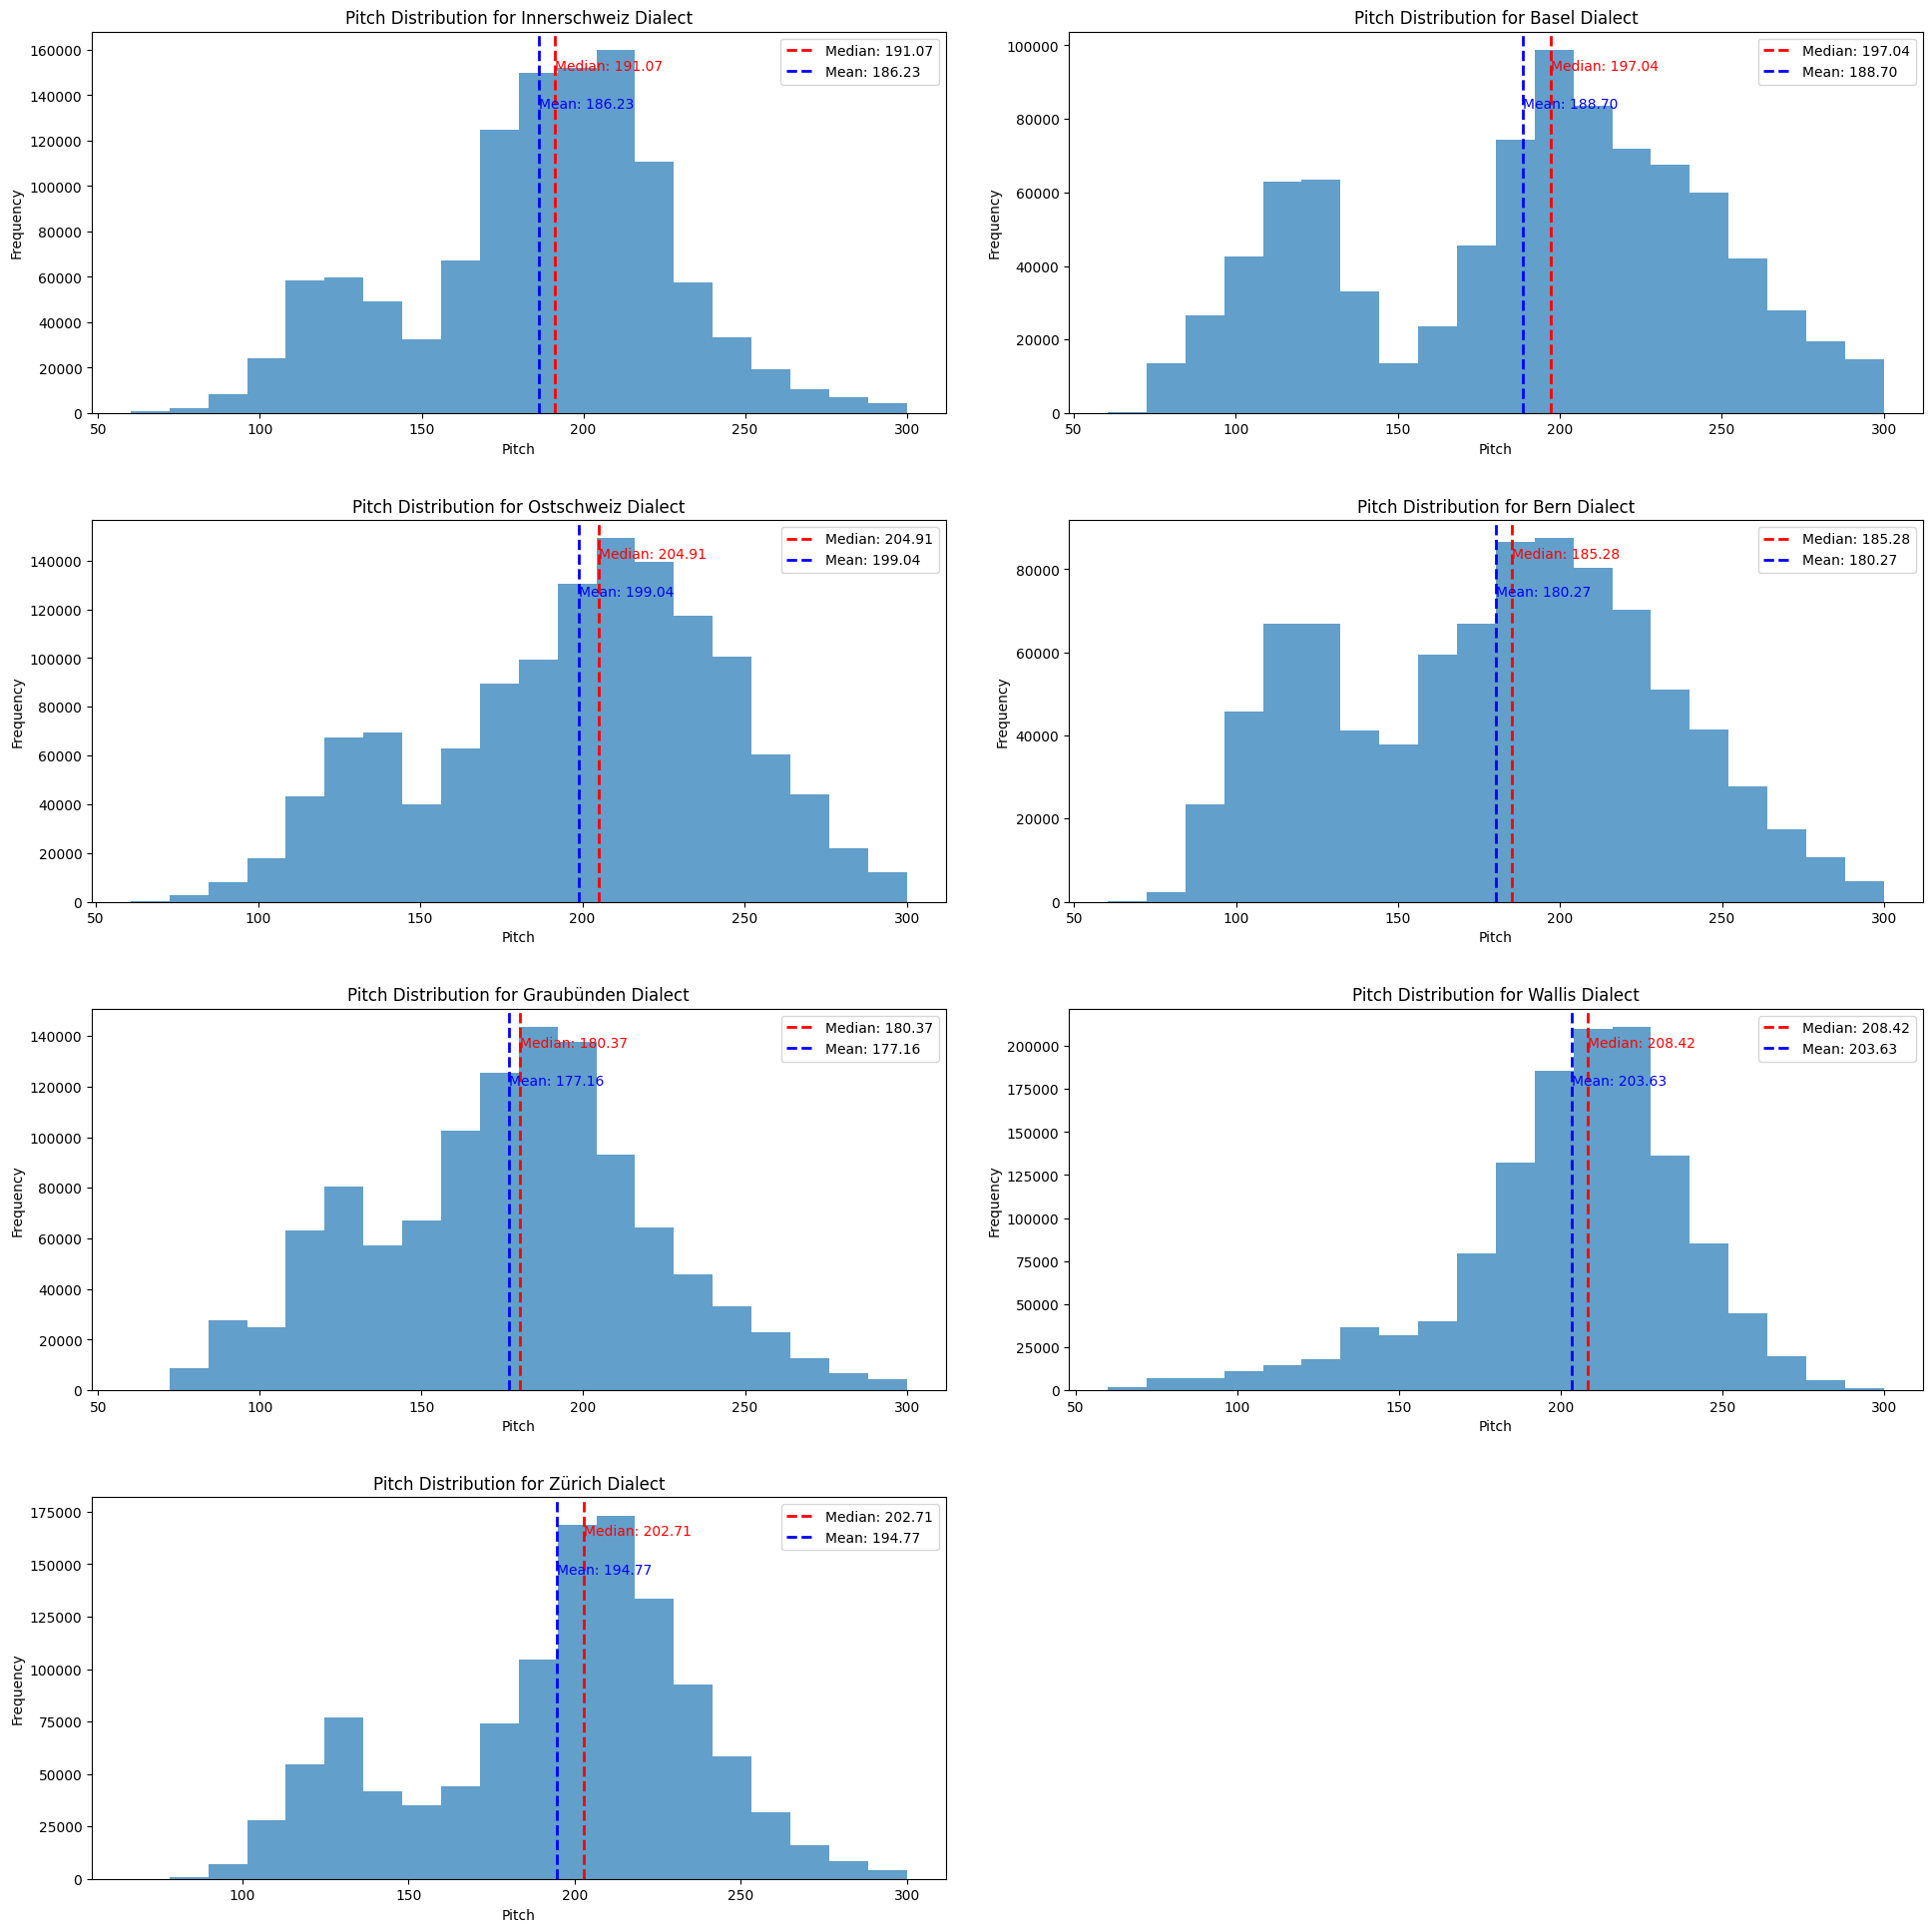

In [339]:
unique_regions = result_df['dialect_region'].unique()
assert len(unique_regions) == 7, "Es sollte genau 7 einzigartige Dialektregionen geben."

plt.figure(figsize=(20, 20))

# Histogramm
for i, region in enumerate(unique_regions, start=1):
    plt.subplot(4, 2, i)
    region_data = result_df[result_df['dialect_region'] == region]['Pitch']
    plt.hist(region_data, bins=20, alpha=0.7)
    plt.title(f'Pitch Distribution for {region} Dialect')
    plt.xlabel('Pitch')
    plt.ylabel('Frequency')

    # Berechnen von Median und Mittelwert der Daten
    median_value = np.median(region_data)
    mean_value = np.mean(region_data)

    # Linien für den Median und Mittel
    plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

    # Text Median und Mittelwert
    plt.text(s=f'Median: {median_value:.2f}', x=median_value, y=plt.ylim()[1]*0.9, color='red')
    plt.text(s=f'Mean: {mean_value:.2f}', x=mean_value, y=plt.ylim()[1]*0.8, color='blue')

    plt.legend()

plt.tight_layout(pad=3.0)
plt.show()

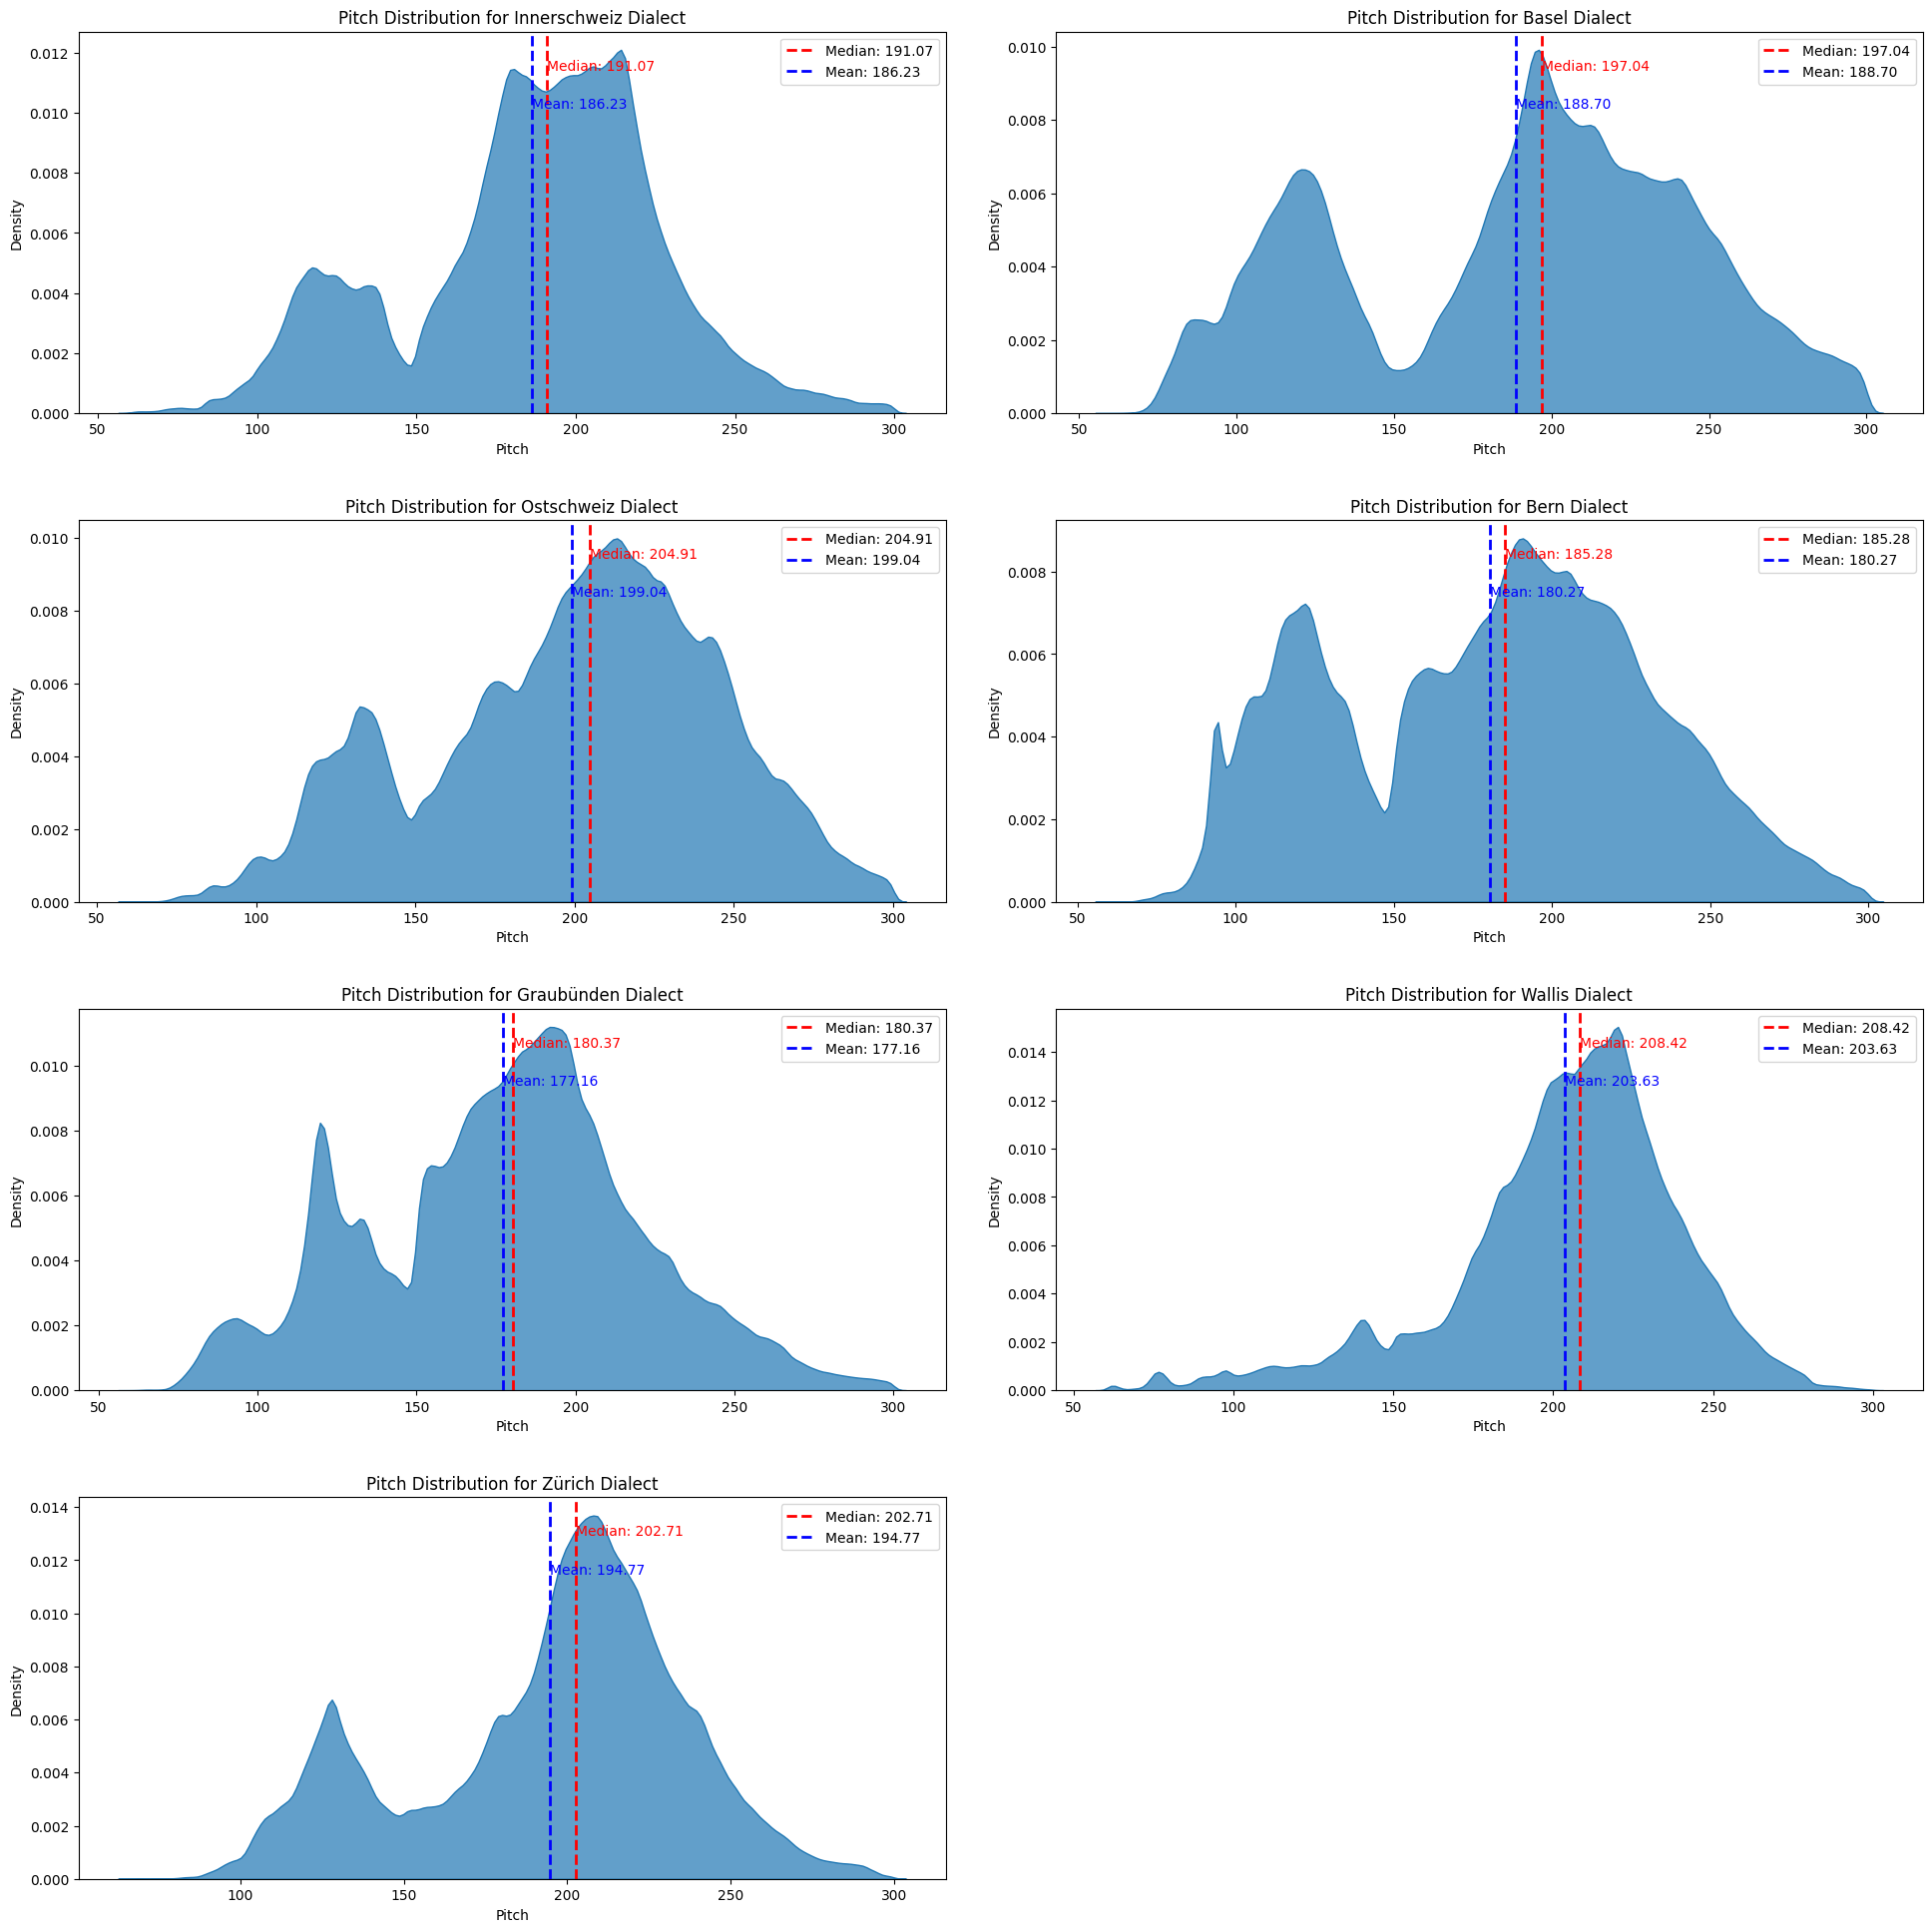

In [340]:
unique_regions = result_df['dialect_region'].unique()
assert len(unique_regions) == 7, "Es sollte genau 7 einzigartige Dialektregionen geben."

plt.figure(figsize=(20, 20))

# Dichteplot
for i, region in enumerate(unique_regions, start=1):
    plt.subplot(4, 2, i)
    region_data = result_df[result_df['dialect_region'] == region]['Pitch']
    sns.kdeplot(region_data, bw_adjust=0.5, fill=True, alpha=0.7)
    plt.title(f'Pitch Distribution for {region} Dialect')
    plt.xlabel('Pitch')
    plt.ylabel('Density')

    # Berechnen von Median und Mittelwert
    median_value = np.median(region_data)
    mean_value = np.mean(region_data)

    # Linien für Median und Mittel
    plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

    # Text für Median und Mittelwert
    plt.text(s=f'Median: {median_value:.2f}', x=median_value, y=plt.ylim()[1]*0.9, color='red')
    plt.text(s=f'Mean: {mean_value:.2f}', x=mean_value, y=plt.ylim()[1]*0.8, color='blue')

    plt.legend()

plt.tight_layout(pad=3.0)
plt.show()

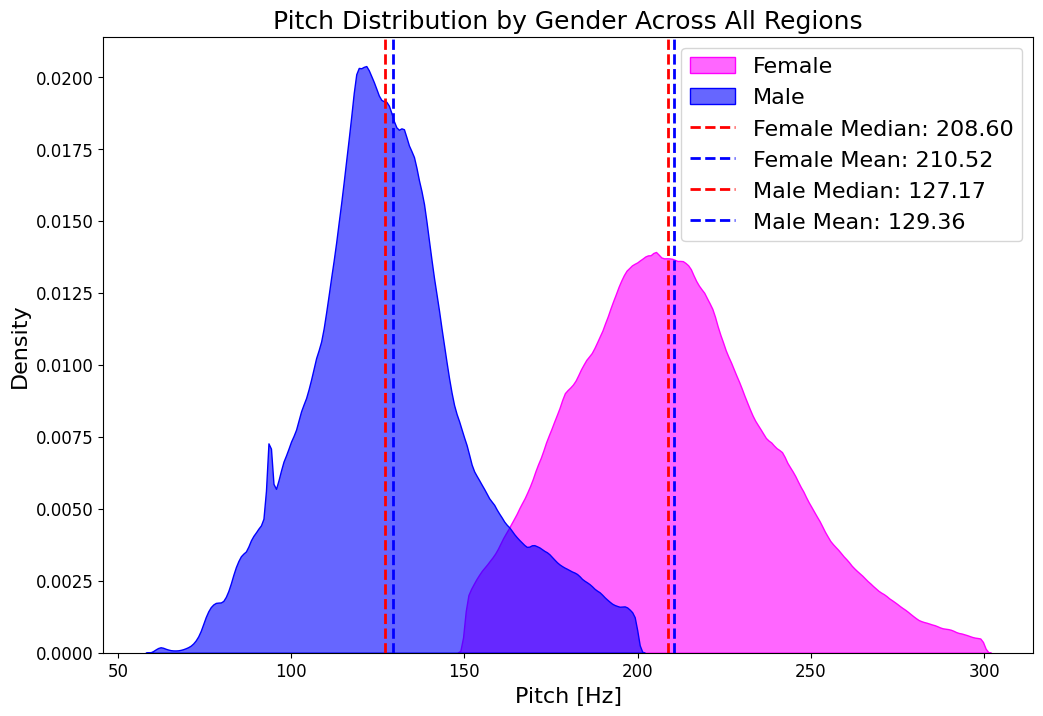

In [341]:
plt.figure(figsize=(12, 8))

# Filtern der Daten nach Geschlecht
female_data = result_df[result_df['gender'] == 'female']['Pitch']
male_data = result_df[result_df['gender'] == 'male']['Pitch']

# Dichteplot für weibliche und männliche Sprecher
sns.kdeplot(female_data, bw_adjust=0.5, fill=True, color='magenta', alpha=0.6, label='Female')
sns.kdeplot(male_data, bw_adjust=0.5, fill=True, color='blue', alpha=0.6, label='Male')

# Berechnung von Median und Mittelwert für weibliche Sprecher
median_female = np.median(female_data.dropna())
mean_female = np.mean(female_data.dropna())

# Berechnung von Median und Mittelwert für männliche Sprecher
median_male = np.median(male_data.dropna())
mean_male = np.mean(male_data.dropna())

# Hinzufügen von Linien für Median und Mittelwert
plt.axvline(median_female, color='red', linestyle='dashed', linewidth=2, label=f'Female Median: {median_female:.2f}')
plt.axvline(mean_female, color='blue', linestyle='dashed', linewidth=2, label=f'Female Mean: {mean_female:.2f}')
plt.axvline(median_male, color='red', linestyle='dashed', linewidth=2, label=f'Male Median: {median_male:.2f}')
plt.axvline(mean_male, color='blue', linestyle='dashed', linewidth=2, label=f'Male Mean: {mean_male:.2f}')

# Einstellung von Titel und Achsenbeschriftungen
plt.title('Pitch Distribution by Gender Across All Regions', fontsize=18)
plt.xlabel('Pitch [Hz]', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.legend(fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


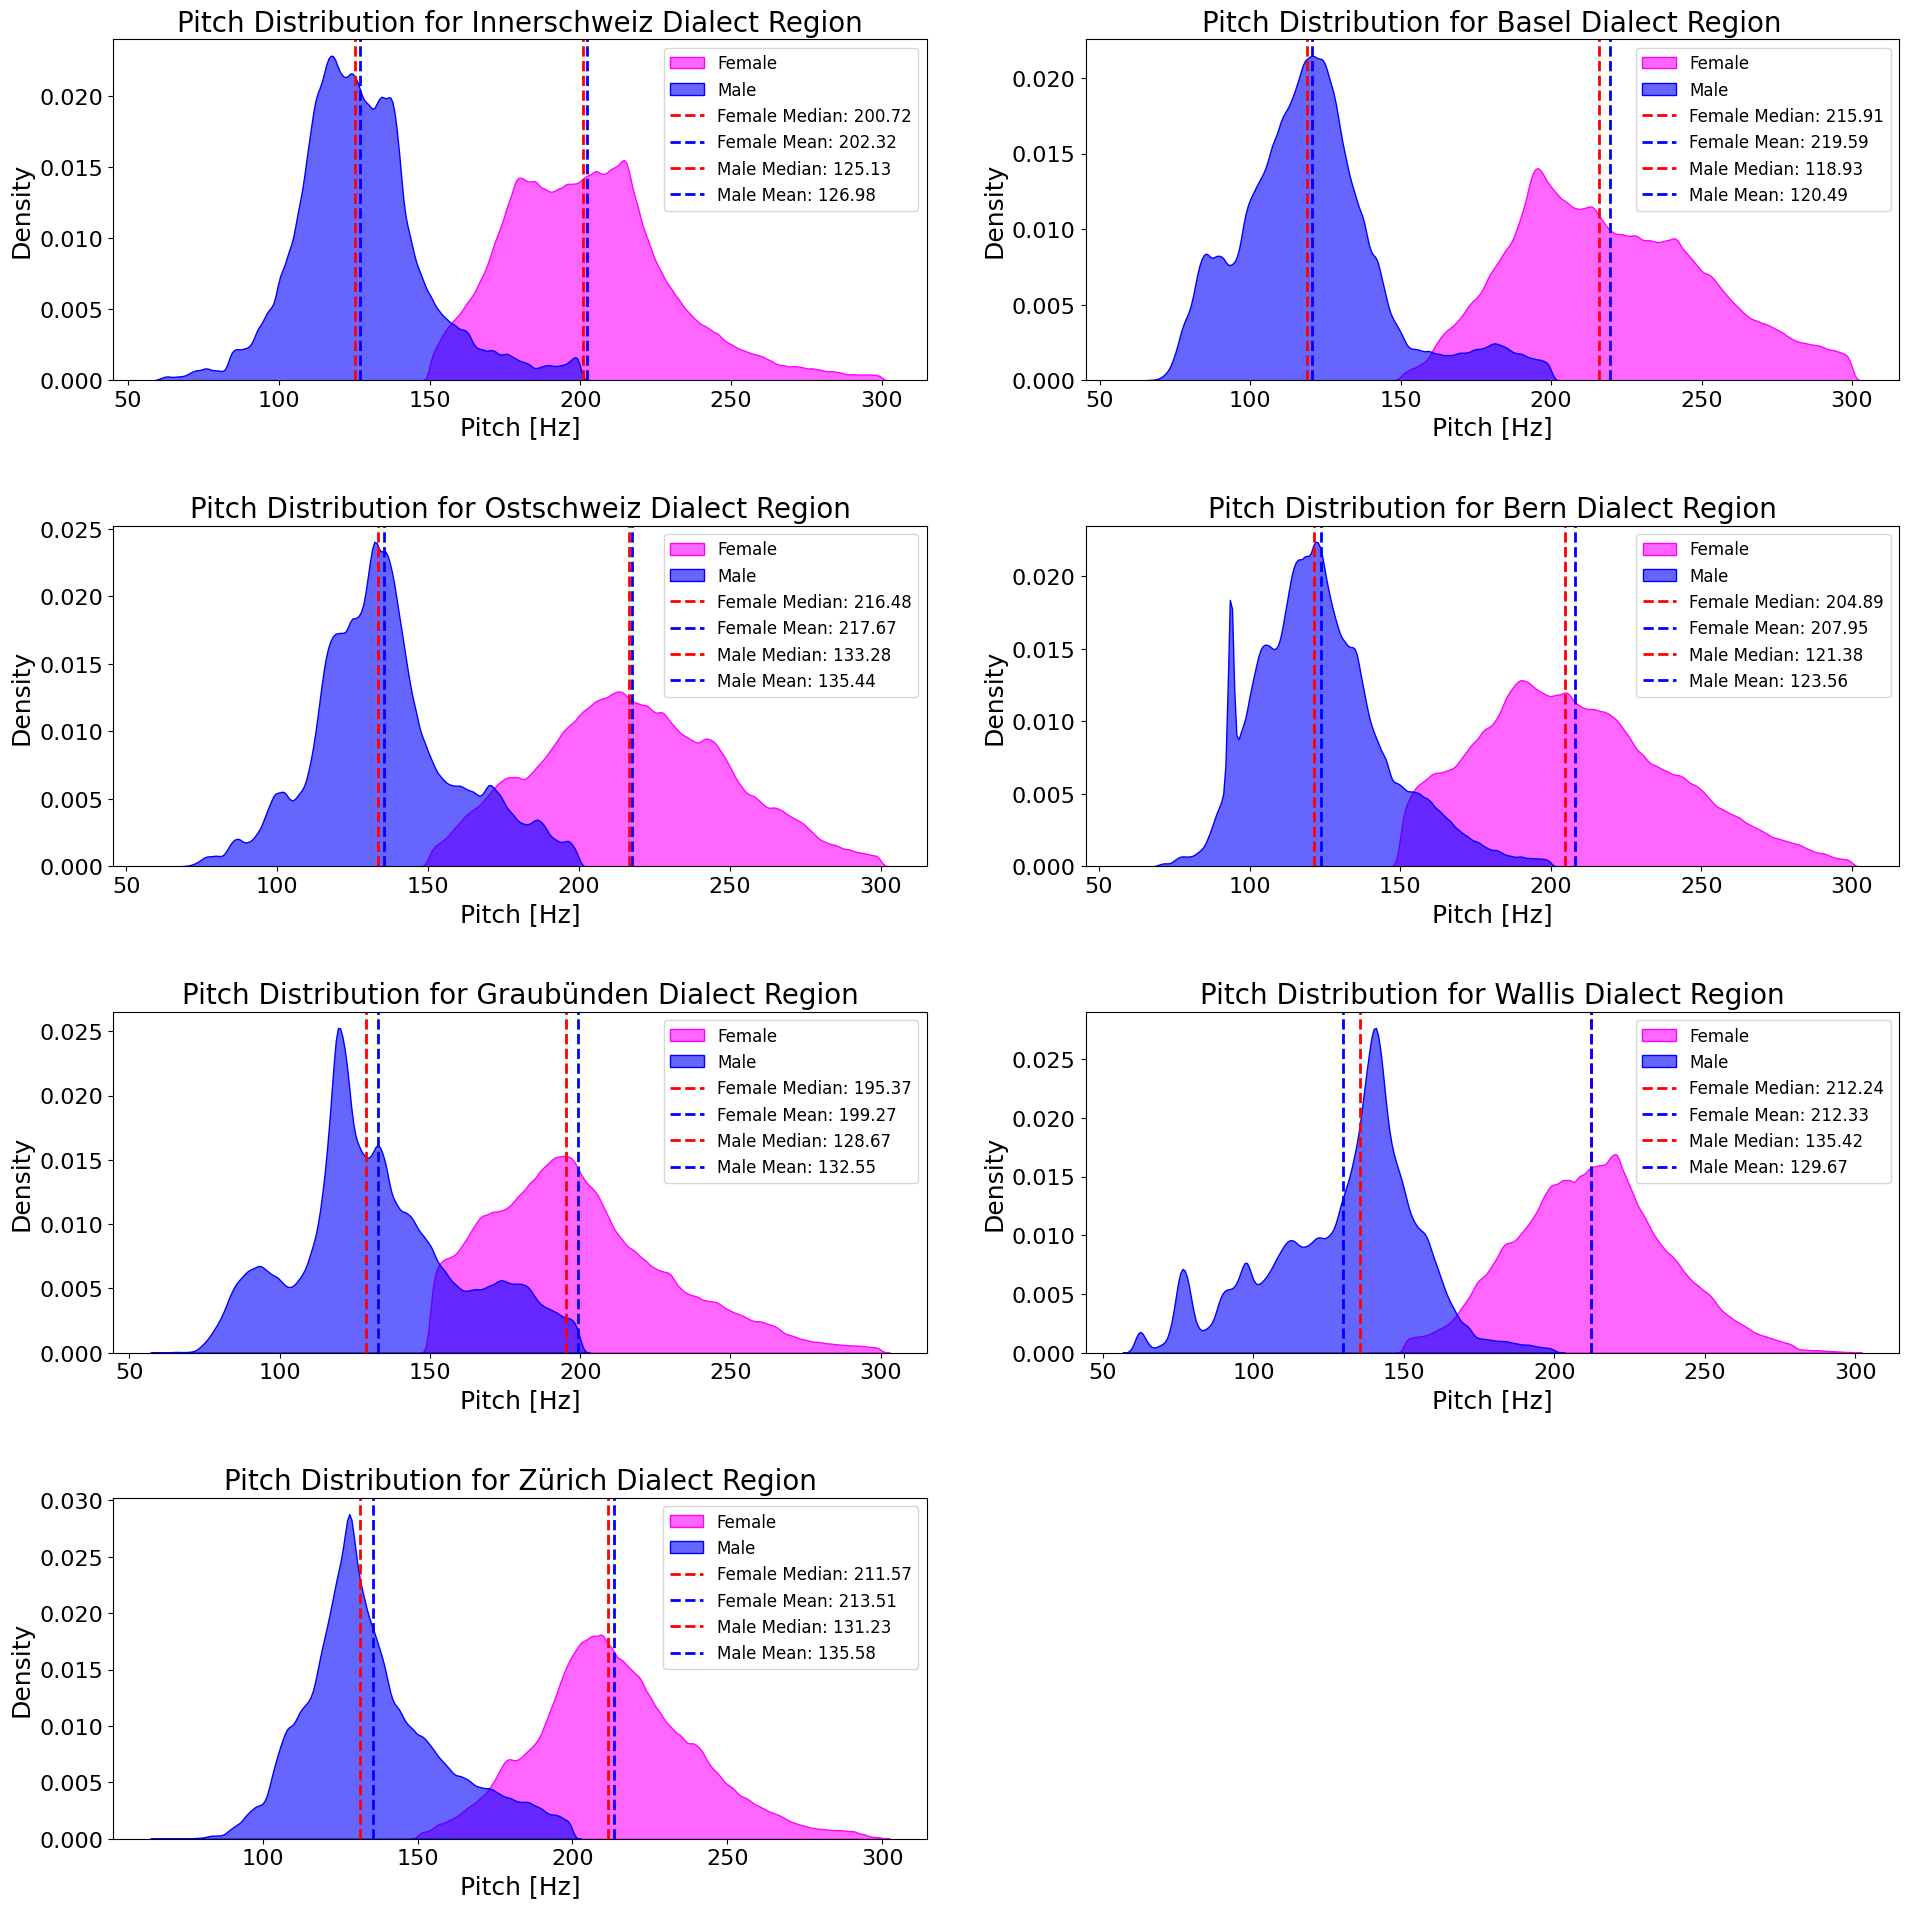

In [342]:
unique_regions = result_df['dialect_region'].unique()
assert len(unique_regions) == 7, "Es sollte genau 7 einzigartige Dialektregionen geben."

plt.figure(figsize=(20, 20))

# Dichteplot für Dialekt Regionen
for i, region in enumerate(unique_regions, start=1):
    plt.subplot(4, 2, i)
    region_data_female = result_df[(result_df['dialect_region'] == region) & (result_df['gender'] == 'female')]['Pitch']
    region_data_male = result_df[(result_df['dialect_region'] == region) & (result_df['gender'] == 'male')]['Pitch']

    # Plot für weibliche Sprecher
    sns.kdeplot(region_data_female, bw_adjust=0.5, fill=True, color='magenta', alpha=0.6, label='Female')
    # Plot für männliche Sprecher
    sns.kdeplot(region_data_male, bw_adjust=0.5, fill=True, color='blue', alpha=0.6, label='Male')

    # Berechnen von Median und Mittelwert der Daten für weibliche und männliche Sprecher
    median_value_female = np.median(region_data_female.dropna())
    mean_value_female = np.mean(region_data_female.dropna())
    median_value_male = np.median(region_data_male.dropna())
    mean_value_male = np.mean(region_data_male.dropna())

    # Fügen Sie Linien für den Median und das Mittel hinzu
    plt.axvline(median_value_female, color='red', linestyle='dashed', linewidth=2, label=f'Female Median: {median_value_female:.2f}')
    plt.axvline(mean_value_female, color='blue', linestyle='dashed', linewidth=2, label=f'Female Mean: {mean_value_female:.2f}')
    plt.axvline(median_value_male, color='red', linestyle='dashed', linewidth=2, label=f'Male Median: {median_value_male:.2f}')
    plt.axvline(mean_value_male, color='blue', linestyle='dashed', linewidth=2, label=f'Male Mean: {mean_value_male:.2f}')

    # Großformatige Titel, Achsenbeschriftungen und Legenden
    plt.title(f'Pitch Distribution for {region} Dialect Region', fontsize=20)
    plt.xlabel('Pitch [Hz]', fontsize=18)
    plt.ylabel('Density', fontsize=18)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.legend(fontsize=12)

plt.tight_layout(pad=4.0)
plt.show()


### Varianz grafisch Untersucht

#### Sprachregion

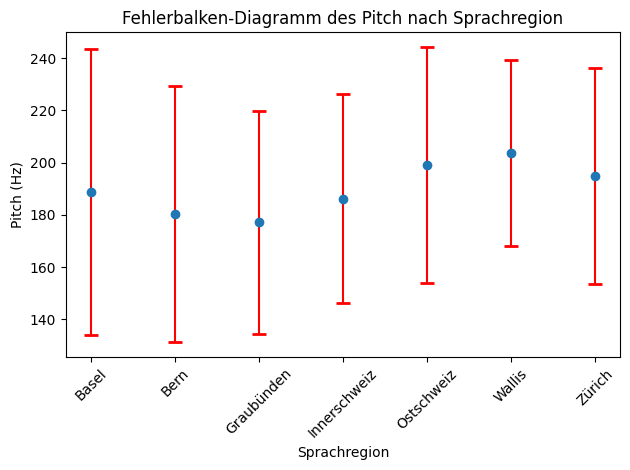

In [343]:
# Mittelwert und Standardabweichung für 'Pitch' für jede 'dialect_region'
pitch_means = result_df.groupby('dialect_region')['Pitch'].mean()
pitch_stddevs = result_df.groupby('dialect_region')['Pitch'].std()

# Fehlerbalken-Diagramm
plt.errorbar(pitch_means.index, pitch_means, yerr=pitch_stddevs, fmt='o', ecolor='red', capthick=2, capsize=5)
plt.title('Fehlerbalken-Diagramm des Pitch nach Sprachregion')
plt.xlabel('Sprachregion')
plt.ylabel('Pitch (Hz)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

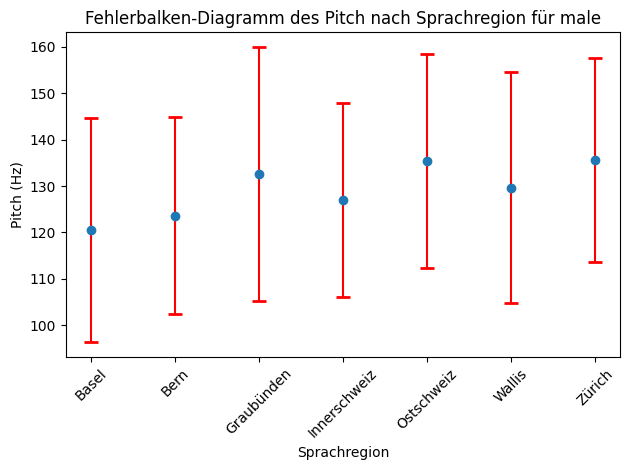

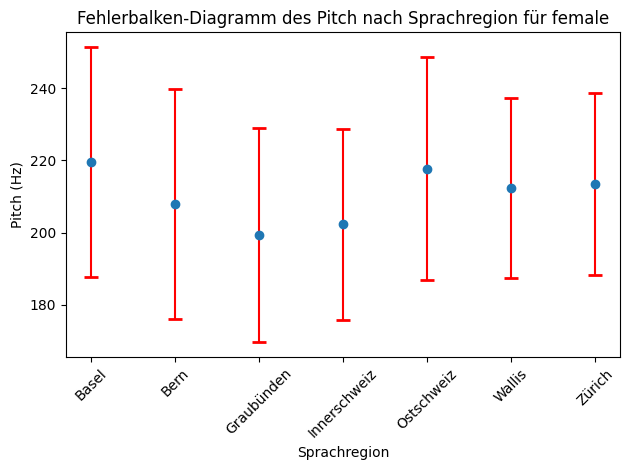

In [344]:
# Gruppiere nach 'gender' und 'dialect_region' und berechne Mittelwert und Standardabweichung
pitch_stats = result_df.groupby(['gender', 'dialect_region'])['Pitch'].agg(['mean', 'std'])

# Fehlerbalkenplot nach gender
genders = ['male', 'female']
for gender in genders:
    if gender in pitch_stats.index.get_level_values(0):
        means = pitch_stats.loc[gender, 'mean']
        stddevs = pitch_stats.loc[gender, 'std']
        
        plt.figure()
        plt.errorbar(means.index, means, yerr=stddevs, fmt='o', ecolor='red', capthick=2, capsize=5)
        plt.title(f'Fehlerbalken-Diagramm des Pitch nach Sprachregion für {gender}')
        plt.xlabel('Sprachregion')
        plt.ylabel('Pitch (Hz)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Keine Daten verfügbar für {gender}")

#### Geschlecht

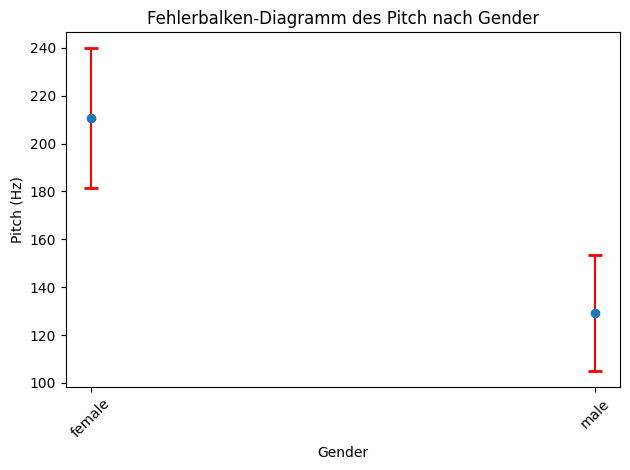

In [345]:
# Berechne Mittelwert und Standardabweichung für 'Pitch' für jede 'dialect_region'
pitch_means = result_df.groupby('gender')['Pitch'].mean()
pitch_stddevs = result_df.groupby('gender')['Pitch'].std()

# Fehlerbalken Plot
plt.errorbar(pitch_means.index, pitch_means, yerr=pitch_stddevs, fmt='o', ecolor='red', capthick=2, capsize=5)
plt.title('Fehlerbalken-Diagramm des Pitch nach Gender')
plt.xlabel('Gender')
plt.ylabel('Pitch (Hz)')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

#### Alter

C:\Users\pzinn\AppData\Local\Temp\ipykernel_11456\609093545.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pitch_means = result_df.groupby('age')['Pitch'].mean()
C:\Users\pzinn\AppData\Local\Temp\ipykernel_11456\609093545.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pitch_stddevs = result_df.groupby('age')['Pitch'].std()


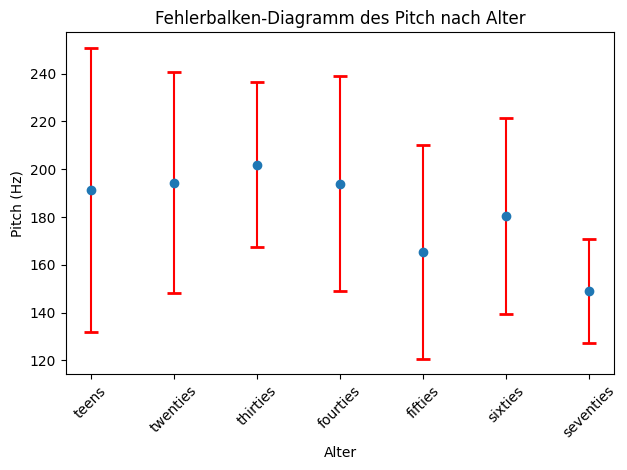

In [346]:
# Alterskategorien Reihenfolge
age_categories_sorted = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies']

result_df['age'] = pd.Categorical(result_df['age'], categories=age_categories_sorted, ordered=True)
result_df.sort_values('age', inplace=True)

# Berechne Mittelwert und Standardabweichung für 'Pitch' für jede 'age' Kategorie
pitch_means = result_df.groupby('age')['Pitch'].mean()
pitch_stddevs = result_df.groupby('age')['Pitch'].std()

# Fehlerbalken Plot
plt.errorbar(pitch_means.index, pitch_means, yerr=pitch_stddevs, fmt='o', ecolor='red', capthick=2, capsize=5)
plt.title('Fehlerbalken-Diagramm des Pitch nach Alter')
plt.xlabel('Alter')
plt.ylabel('Pitch (Hz)')
plt.xticks(rotation=45)  # Drehe die x-Achsen-Beschriftungen für bessere Lesbarkeit
plt.tight_layout()  # Passt das Layout an, damit alles sichtbar ist
plt.show()

C:\Users\pzinn\AppData\Local\Temp\ipykernel_11456\947489762.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  male_stats = male_df.groupby('age')['Pitch'].agg(['mean', 'std'])
C:\Users\pzinn\AppData\Local\Temp\ipykernel_11456\947489762.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  female_stats = female_df.groupby('age')['Pitch'].agg(['mean', 'std'])


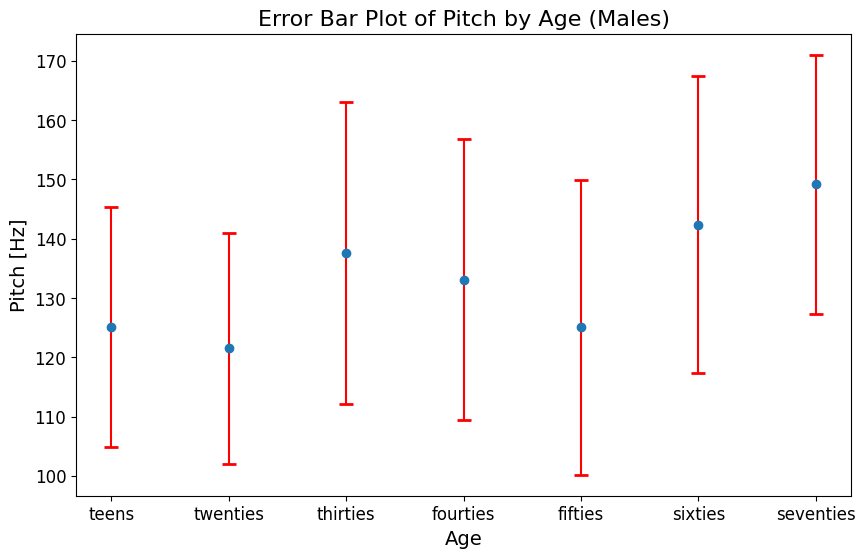

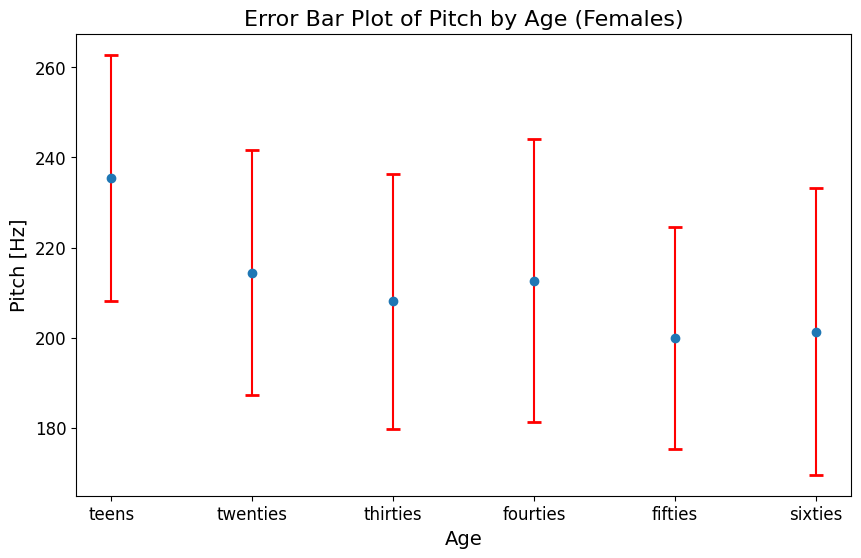

In [347]:
age_order = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies']
result_df['age'] = pd.Categorical(result_df['age'], categories=age_order, ordered=True)

# Geschlecht filtern
male_df = result_df[result_df['gender'] == 'male']
female_df = result_df[result_df['gender'] == 'female']

# Mittelwert und Standardabweichung
male_stats = male_df.groupby('age')['Pitch'].agg(['mean', 'std'])
female_stats = female_df.groupby('age')['Pitch'].agg(['mean', 'std'])

# male
plt.figure(figsize=(10, 6))
plt.errorbar(male_stats.index, male_stats['mean'], yerr=male_stats['std'], fmt='o', ecolor='red', capthick=2, capsize=5)
plt.title('Error Bar Plot of Pitch by Age (Males)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Pitch [Hz]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# female
plt.figure(figsize=(10, 6))  # Making the figure larger for females as well
plt.errorbar(female_stats.index, female_stats['mean'], yerr=female_stats['std'], fmt='o', ecolor='red', capthick=2, capsize=5)
plt.title('Error Bar Plot of Pitch by Age (Females)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Pitch [Hz]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [348]:
# Gruppieren nach 'age' und 'gender', dann Zählen der einzigartigen 'client_id's für jede Gruppe
unique_client_counts = result_df.groupby(['age', 'gender'])['client_id'].nunique()
print(unique_client_counts)

C:\Users\pzinn\AppData\Local\Temp\ipykernel_11456\3339743418.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_client_counts = result_df.groupby(['age', 'gender'])['client_id'].nunique()


age        gender
teens      female     4
           male       7
twenties   female    34
           male      30
thirties   female    22
           male      13
fourties   female    16
           male      19
fifties    female     5
           male      14
sixties    female    10
           male      11
seventies  female     0
           male       2
Name: client_id, dtype: int64


In [349]:
# Anzahl Sequenzen nach gender und Sprachregion
count_by_region_and_gender = result_df.groupby(['dialect_region', 'gender']).size()
count_by_region_and_gender_df = count_by_region_and_gender.unstack()
print(count_by_region_and_gender_df)

gender           female    male
dialect_region                 
Basel            609672  276081
Bern             596950  291338
Graubünden       749988  371693
Innerschweiz     891273  242043
Ostschweiz       986821  289004
Wallis          1144441  134687
Zürich           876678  277523


In [350]:
# Anzahl Personen nach gender und Sprachregion
unique_clients_by_region_and_gender = result_df.groupby(['dialect_region', 'gender'])['client_id'].nunique()
unique_clients_by_region_and_gender_df = unique_clients_by_region_and_gender.unstack()
print(unique_clients_by_region_and_gender_df)

gender          female  male
dialect_region              
Basel               11    16
Bern                10    15
Graubünden          14    17
Innerschweiz        13    12
Ostschweiz          14    13
Wallis              18     9
Zürich              11    14


## Vorhersage

### Sprachregion

In [352]:
def handle_unknown_labels(values, encoder):
    known_labels = set(encoder.classes_)
    return np.array([encoder.transform([v])[0] if v in known_labels else -1 for v in values])

# Umformen des Trainings-DataFrames
agg_features = result_df.groupby(['File', 'dialect_region', 'client_id']).agg({
    'Pitch': ['mean', 'std', 'min', 'max'],
    'gender': 'first',
    'age': 'first'
}).reset_index()
agg_features.columns = ['File', 'dialect_region', 'client_id', 'Pitch_mean', 'Pitch_std', 'Pitch_min', 'Pitch_max', 'gender', 'age']

# Separater Encoder für 'gender' und 'age'
gender_encoder = LabelEncoder()
age_encoder = LabelEncoder()

# Konvertieren von kategorischen Daten in numerische Werte
agg_features['gender'] = gender_encoder.fit_transform(agg_features['gender'])
agg_features['age'] = age_encoder.fit_transform(agg_features['age'])

# Vorbereitung der Features und Labels für das Training
X = agg_features[['Pitch_mean', 'Pitch_std', 'Pitch_min', 'Pitch_max', 'gender']]
y = agg_features['dialect_region']

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell initialisieren und trainieren
classifier_sprachregion = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_sprachregion.fit(X_train, y_train)

# Vorhersagen auf dem Testsplit
y_pred = classifier_sprachregion.predict(X_test)

# Ergebnisse auswerten
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Basel       0.34      0.40      0.37      4101
        Bern       0.26      0.23      0.24      3659
  Graubünden       0.33      0.30      0.31      3829
Innerschweiz       0.30      0.30      0.30      4144
  Ostschweiz       0.33      0.31      0.32      4085
      Wallis       0.37      0.42      0.39      4098
      Zürich       0.31      0.30      0.31      3641

    accuracy                           0.32     27557
   macro avg       0.32      0.32      0.32     27557
weighted avg       0.32      0.32      0.32     27557



In [353]:
# auf test Daten
# Umformen des Test-DataFrames ähnlich wie bei den Trainingsdaten
agg_features_test = result_df_test.groupby(['File', 'dialect_region', 'client_id']).agg({
    'Pitch': ['mean', 'std', 'min', 'max'],
    'gender': 'first',
    'age': 'first'
}).reset_index()
agg_features_test.columns = ['File', 'dialect_region', 'client_id', 'Pitch_mean', 'Pitch_std', 'Pitch_min', 'Pitch_max', 'gender', 'age']

# Anwenden der Encoder auf die Testdaten mit Behandlung unbekannter Werte
agg_features_test['gender'] = handle_unknown_labels(agg_features_test['gender'], gender_encoder)
agg_features_test['age'] = handle_unknown_labels(agg_features_test['age'], age_encoder)

# Auswahl der Features für die Vorhersage
X_new = agg_features_test[['Pitch_mean', 'Pitch_std', 'Pitch_min', 'Pitch_max', 'gender']]

# Vorhersagen auf dem neuen Datensatz
y_pred_new = classifier_sprachregion.predict(X_new)

# Optional: Auswertung der Vorhersagen, wenn y_true für result_df_test vorhanden ist
y_true_new = agg_features_test['dialect_region']
print(classification_report(y_true_new, y_pred_new))

              precision    recall  f1-score   support

       Basel       0.07      0.08      0.08      3228
        Bern       0.15      0.13      0.14      3270
  Graubünden       0.14      0.13      0.14      3436
Innerschweiz       0.12      0.12      0.12      3494
  Ostschweiz       0.14      0.14      0.14      3241
      Wallis       0.27      0.32      0.29      3514
      Zürich       0.18      0.16      0.17      3237

    accuracy                           0.16     23420
   macro avg       0.15      0.16      0.15     23420
weighted avg       0.15      0.16      0.15     23420



### Geschlecht

In [354]:
def encode_with_unknowns(column, encoder=None, fit=False):
    if fit:
        # Wenn fit=True ist, erstellen wir einen neuen Encoder und trainieren ihn
        encoder = LabelEncoder()
        encoder.fit(column)
        column_encoded = encoder.transform(column)
    else:
        # Hier handhaben wir unbekannte Werte
        known_labels = set(encoder.classes_)
        column_encoded = np.array([encoder.transform([v])[0] if v in known_labels else -1 for v in column])
    return column_encoded, encoder

# Umformen des Trainings-DataFrames
agg_features = result_df.groupby(['File', 'client_id']).agg({
    'Pitch': ['mean', 'std', 'min', 'max'],
    'gender': 'first',
    'age': 'first',
    'dialect_region': 'first'
}).reset_index()

# Umbenennen der Spalten nach der Aggregation
agg_features.columns = ['File', 'client_id', 'Pitch_mean', 'Pitch_std', 'Pitch_min', 'Pitch_max', 'gender', 'age', 'dialect_region']

# Erstellen und Anwenden von Encodern
agg_features['gender'], gender_encoder = encode_with_unknowns(agg_features['gender'], fit=True)
agg_features['age'], age_encoder = encode_with_unknowns(agg_features['age'], fit=True)
agg_features['dialect_region'], dialect_encoder = encode_with_unknowns(agg_features['dialect_region'], fit=True)

# Vorbereitung der Features und Labels für das Training
X = agg_features[['Pitch_mean', 'Pitch_std', 'Pitch_min', 'Pitch_max', 'dialect_region']]
y = agg_features['gender']

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell initialisieren und trainieren
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred = classifier.predict(X_test)

# Ergebnisse auswerten
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14837
           1       0.99      0.99      0.99     12720

    accuracy                           0.99     27557
   macro avg       0.99      0.99      0.99     27557
weighted avg       0.99      0.99      0.99     27557



In [355]:
# Anwenden auf test
# Umformen des Test-DataFrames
agg_features_test = result_df_test.groupby(['File', 'client_id']).agg({
    'Pitch': ['mean', 'std', 'min', 'max'],
    'gender': 'first',
    'age': 'first',
    'dialect_region': 'first'
}).reset_index()

# Umbenennen der Spalten nach der Aggregation
agg_features_test.columns = ['File', 'client_id', 'Pitch_mean', 'Pitch_std', 'Pitch_min', 'Pitch_max', 'gender', 'age', 'dialect_region']

# Anwenden der Encoder mit Handhabung unbekannter Labels
agg_features_test['gender'] = encode_with_unknowns(agg_features_test['gender'], gender_encoder)[0]
agg_features_test['age'] = encode_with_unknowns(agg_features_test['age'], age_encoder)[0]
agg_features_test['dialect_region'] = encode_with_unknowns(agg_features_test['dialect_region'], dialect_encoder)[0]

# Auswahl der Features für die Vorhersage
X_test_new = agg_features_test[['Pitch_mean', 'Pitch_std', 'Pitch_min', 'Pitch_max', 'dialect_region']]

# Vorhersagen auf dem neuen Datensatz
y_pred_new = classifier.predict(X_test_new)

# Optional: Auswertung der Vorhersagen, wenn y_true für result_df_test vorhanden ist
# Annahme: Wir kennen die wahren Geschlechtsdaten im Testdatensatz
print(classification_report(agg_features_test['gender'], y_pred_new))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     14202
           1       0.96      0.99      0.98      9218

    accuracy                           0.98     23420
   macro avg       0.98      0.98      0.98     23420
weighted avg       0.98      0.98      0.98     23420



## Signifikant Testen

C:\Users\pzinn\AppData\Local\Temp\ipykernel_11456\4125063812.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = result_df.groupby(['dialect_region', 'gender']).apply(


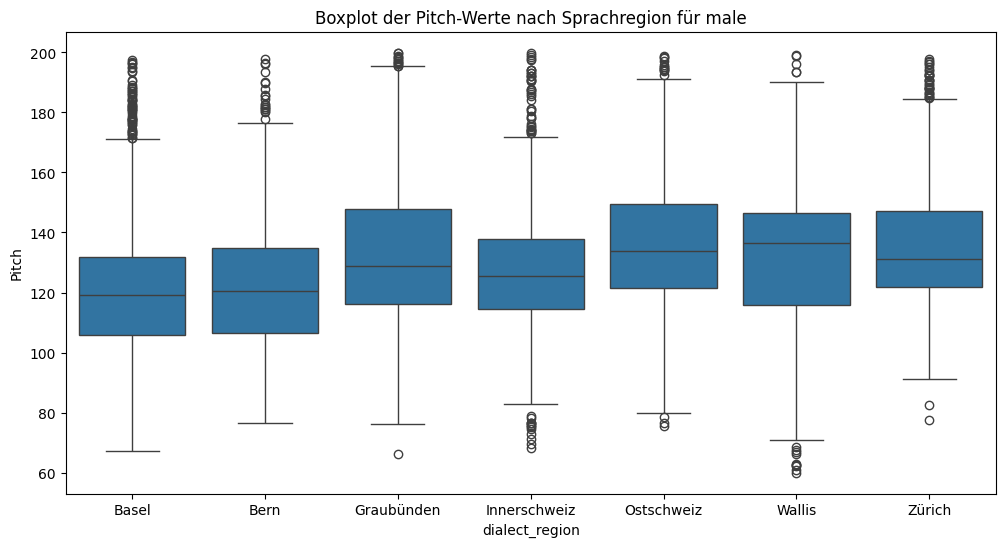

Kruskal-Wallis-Test Statistik für male: 452.6750036094006, p-Wert: 1.3037445091541134e-94
Post-hoc Dunn-Test Ergebnisse für male:
                     Basel          Bern    Graubünden  Innerschweiz  \
Basel         1.000000e+00  1.000000e+00  7.670078e-25  9.256876e-10   
Bern          1.000000e+00  1.000000e+00  1.538589e-18  6.038339e-06   
Graubünden    7.670078e-25  1.538589e-18  1.000000e+00  1.380082e-03   
Innerschweiz  9.256876e-10  6.038339e-06  1.380082e-03  1.000000e+00   
Ostschweiz    3.313878e-51  5.773586e-42  6.269465e-05  9.641583e-17   
Wallis        1.077885e-34  3.621871e-27  1.000000e+00  5.982770e-08   
Zürich        9.354756e-46  4.800082e-37  2.697590e-03  1.103342e-13   

                Ostschweiz        Wallis        Zürich  
Basel         3.313878e-51  1.077885e-34  9.354756e-46  
Bern          5.773586e-42  3.621871e-27  4.800082e-37  
Graubünden    6.269465e-05  1.000000e+00  2.697590e-03  
Innerschweiz  9.641583e-17  5.982770e-08  1.103342e-13  
Ostschwe

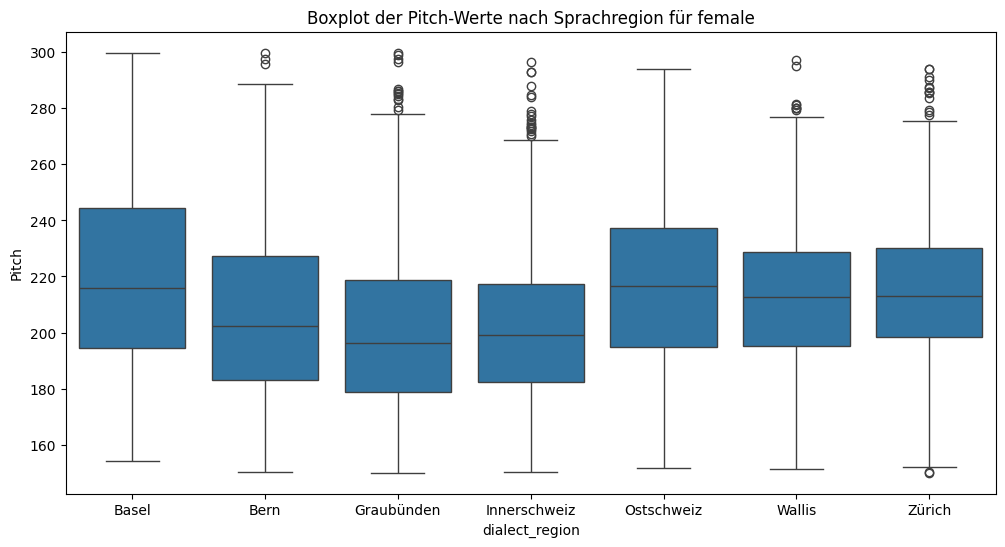

Kruskal-Wallis-Test Statistik für female: 414.26322901203025, p-Wert: 2.396287533310042e-86
Post-hoc Dunn-Test Ergebnisse für female:
                     Basel          Bern    Graubünden  Innerschweiz  \
Basel         1.000000e+00  2.185007e-18  5.010335e-41  9.890371e-37   
Bern          2.185007e-18  1.000000e+00  1.109632e-04  2.896284e-03   
Graubünden    5.010335e-41  1.109632e-04  1.000000e+00  1.000000e+00   
Innerschweiz  9.890371e-37  2.896284e-03  1.000000e+00  1.000000e+00   
Ostschweiz    1.000000e+00  5.484856e-16  2.086155e-37  2.603909e-33   
Wallis        2.883478e-02  8.390311e-08  3.507670e-24  6.568054e-21   
Zürich        1.000000e+00  1.922560e-12  6.961243e-32  4.129214e-28   

                Ostschweiz        Wallis        Zürich  
Basel         1.000000e+00  2.883478e-02  1.000000e+00  
Bern          5.484856e-16  8.390311e-08  1.922560e-12  
Graubünden    2.086155e-37  3.507670e-24  6.961243e-32  
Innerschweiz  2.603909e-33  6.568054e-21  4.129214e-28  
Osts

In [356]:
### Nach Sequenzen mit Stichprobe (theoretisch erlaubt aber Ansatz verworfen)
result_df = result_df.reset_index()

# Stichprobenziehung: 1000 Proben pro dialect_region und gender, wenn möglich
sampled_df = result_df.groupby(['dialect_region', 'gender']).apply(
    lambda x: x.sample(n=1000, replace=False) if len(x) >= 1000 else x
).reset_index(drop=True)

# Visualisierung mit Boxplots für jedes Geschlecht
for gender in ['male', 'female']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='dialect_region', y='Pitch', data=sampled_df[sampled_df['gender'] == gender])
    plt.title(f'Boxplot der Pitch-Werte nach Sprachregion für {gender}')
    plt.show()

    # Kruskal-Wallis-Test für jede Geschlechtsgruppe
    grouped_data = sampled_df[sampled_df['gender'] == gender].groupby('dialect_region')['Pitch']
    stat, p_value = stats.kruskal(*[group.values for name, group in grouped_data])
    print(f'Kruskal-Wallis-Test Statistik für {gender}: {stat}, p-Wert: {p_value}')

    # Dunn-Test für Post-hoc-Analysen, falls der Kruskal-Wallis-Test signifikant ist
    if p_value < 0.05:
        posthoc_results = sp.posthoc_dunn(
            sampled_df[sampled_df['gender'] == gender], 
            val_col='Pitch', 
            group_col='dialect_region', 
            p_adjust='bonferroni'
        )
        print(f'Post-hoc Dunn-Test Ergebnisse für {gender}:\n{posthoc_results}\n')


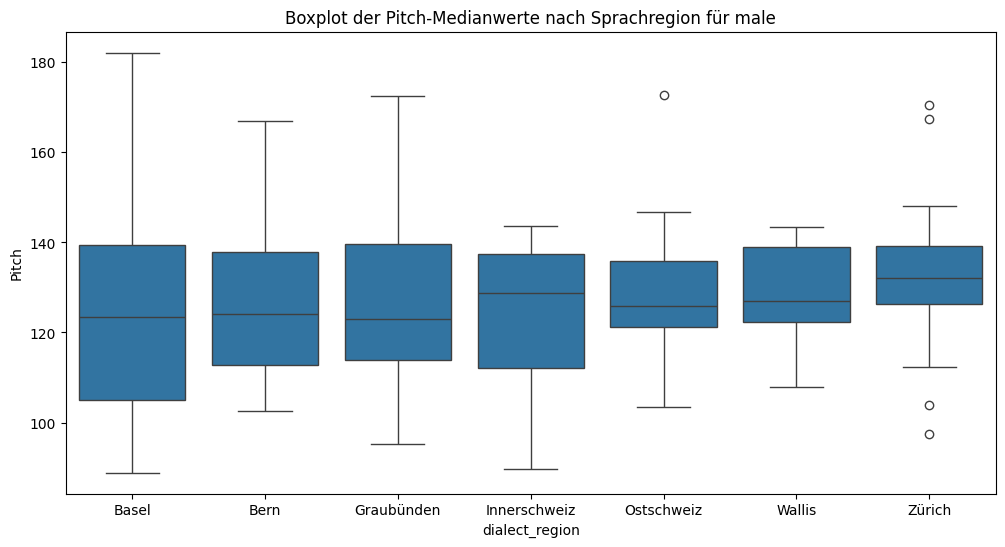

Kruskal-Wallis-Test Statistik für male: 1.7606403506750326, p-Wert: 0.9403443854665329


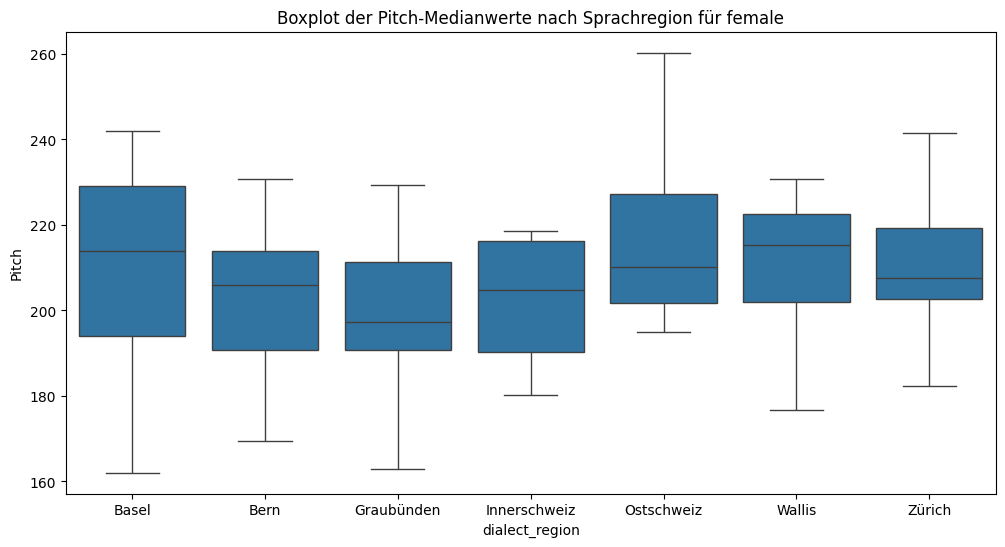

Kruskal-Wallis-Test Statistik für female: 9.439241503837764, p-Wert: 0.1503404446517086


In [357]:
### Nach Person
# Gruppierung nach 'dialect_region', 'gender' und 'client_id' und Berechnung des Medianwertes von 'Pitch' für jede Person
grouped_median_df = result_df.groupby(['dialect_region', 'gender', 'client_id'])['Pitch'].median().reset_index()

# Visualisierung mit Boxplots für jedes Geschlecht
for gender in ['male', 'female']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='dialect_region', y='Pitch', data=grouped_median_df[grouped_median_df['gender'] == gender])
    plt.title(f'Boxplot der Pitch-Medianwerte nach Sprachregion für {gender}')
    plt.show()

    # Kruskal-Wallis-Test für jede Geschlechtsgruppe
    grouped_data = grouped_median_df[grouped_median_df['gender'] == gender].groupby('dialect_region')['Pitch']
    stat, p_value = stats.kruskal(*[group.values for name, group in grouped_data])
    print(f'Kruskal-Wallis-Test Statistik für {gender}: {stat}, p-Wert: {p_value}')

    # Dunn-Test für Post-hoc-Analysen, falls der Kruskal-Wallis-Test signifikant ist
    if p_value < 0.05:
        posthoc_results = sp.posthoc_dunn(
            grouped_median_df[grouped_median_df['gender'] == gender], 
            val_col='Pitch', 
            group_col='dialect_region', 
            p_adjust='bonferroni'
        )
        print(f'Post-hoc Dunn-Test Ergebnisse für {gender}:\n{posthoc_results}\n')


Male - Basel: Mittelwert = 120.49, Standardabweichung = 24.17, Median = 118.93
Male - Bern: Mittelwert = 123.56, Standardabweichung = 21.26, Median = 121.38
Male - Graubünden: Mittelwert = 132.55, Standardabweichung = 27.42, Median = 128.67
Male - Innerschweiz: Mittelwert = 126.98, Standardabweichung = 20.91, Median = 125.13
Male - Ostschweiz: Mittelwert = 135.44, Standardabweichung = 23.09, Median = 133.28
Male - Wallis: Mittelwert = 129.67, Standardabweichung = 24.96, Median = 135.42
Male - Zürich: Mittelwert = 135.58, Standardabweichung = 22.05, Median = 131.23


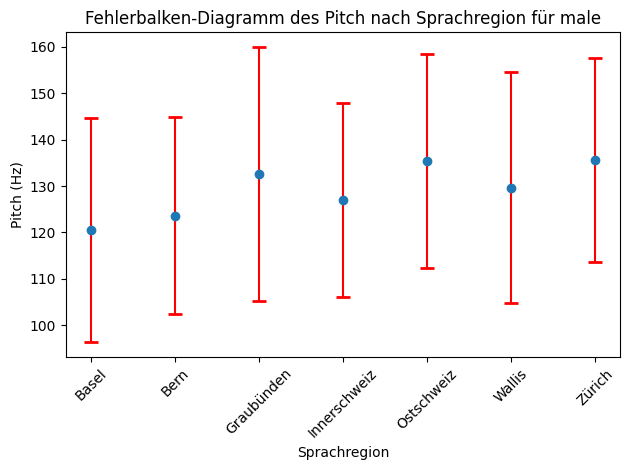

Female - Basel: Mittelwert = 219.59, Standardabweichung = 31.86, Median = 215.91
Female - Bern: Mittelwert = 207.95, Standardabweichung = 31.79, Median = 204.89
Female - Graubünden: Mittelwert = 199.27, Standardabweichung = 29.66, Median = 195.37
Female - Innerschweiz: Mittelwert = 202.32, Standardabweichung = 26.50, Median = 200.72
Female - Ostschweiz: Mittelwert = 217.67, Standardabweichung = 30.92, Median = 216.48
Female - Wallis: Mittelwert = 212.33, Standardabweichung = 24.95, Median = 212.24
Female - Zürich: Mittelwert = 213.51, Standardabweichung = 25.28, Median = 211.57


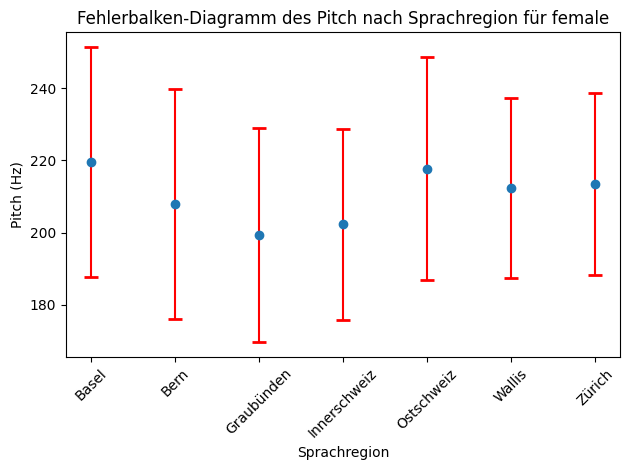

In [358]:
pitch_stats = result_df.groupby(['gender', 'dialect_region'])['Pitch'].agg(['mean', 'std', 'median'])
 
# Erstellen von Plots und Ausgabe der statistischen Werte
genders = ['male', 'female']
for gender in genders:
    if gender in pitch_stats.index.get_level_values(0):
        means = pitch_stats.loc[gender, 'mean']
        stddevs = pitch_stats.loc[gender, 'std']
        medians = pitch_stats.loc[gender, 'median']
        # Ausgabe der Statistiken für jede Region und Geschlecht
        for region in means.index:
            print(f"{gender.capitalize()} - {region}: Mittelwert = {means[region]:.2f}, Standardabweichung = {stddevs[region]:.2f}, Median = {medians[region]:.2f}")
        # Fehlerbalkendiagramm erstellen
        plt.figure()
        plt.errorbar(means.index, means, yerr=stddevs, fmt='o', ecolor='red', capthick=2, capsize=5)
        plt.title(f'Fehlerbalken-Diagramm des Pitch nach Sprachregion für {gender}')
        plt.xlabel('Sprachregion')
        plt.ylabel('Pitch (Hz)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Keine Daten verfügbar für {gender}")

In [359]:
# Zählen der einzigartigen Personen nach Geschlecht und Dialektregion
unique_persons = df_train.groupby(['gender', 'dialect_region'])['client_id'].nunique()
print(unique_persons)

gender  dialect_region
female  Basel             11
        Bern              12
        Graubünden        15
        Innerschweiz      13
        Ostschweiz        14
        Wallis            18
        Zürich            12
male    Basel             16
        Bern              15
        Graubünden        17
        Innerschweiz      12
        Ostschweiz        13
        Wallis             9
        Zürich            15
Name: client_id, dtype: int64
